# 作業 1  

- 題目來源：111年學測數A及數B。
- 此作業的目的不在考數學，而在練習使用 Julia；歡迎上網找相關題目的解答。重點在過程不在答案。
  - [數A影音解答](https://www.youtube.com/watch?v=sWfWqDtsa5o&ab_channel=CMmath)
  - [數B影音解答](https://www.youtube.com/watch?v=j3jigIF2QO8&ab_channel=CMmath)
- 所有數字必須透過程式算出來，不能心算等人為介入。例如：
  - $n(n-1)/2 > 200$, 不能用心算得出 $n$ 最小為15。
  - $-3.1$ 到 $8.9$ 之間有幾個整數，不能扳手指算。
- 假設你的解答過程及答案將作爲補習班教學之用。請適當註解程式，讓解答容易被學生了解。

## (111學測數B單選5) 設矩陣 $A = \begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}$，若 $A^7 - 3A = \begin{bmatrix} a & b \\ c & d\end{bmatrix}$，則 $a + b + c + d$ 之值為何？

In [3]:
A = [1 1; 1 -1]
result = sum(A^7-3A)

10

## (111學測數A單選5） 已知某地區有 30%的人口感染某傳染病。針對該傳染病的快篩試劑檢驗，有陽性或陰性兩結果。已知該試劑將染病者判為陽性的機率為 80%，將未染病者判為陰性的機率則為60%。為降低該試劑將染病者誤判為陰性的情況，專家建議連續採檢三次。若單次採檢判為陰性者中，染病者的機率為 P；而連續採檢三次皆判為陰性者中，染病者的機率為 P '。試問 P/P' 為多少？

In [2]:
TP, TN = 0.8, 0.6
FP, FN = 0.2, 0.4
infected, non_infected = 0.3, 0.7

P = infected*FP / (infected*FP + non_infected*TN)
Pˈ = infected*FP^3/(infected*FP^3 + non_infected*TN^3)  # p\verts
result = P/Pˈ

7.999999999999998

## (111學測數A單選1） 某冰淇淋店最少需準備 n 桶不同口味的冰淇淋，才能滿足廣告所稱「任選兩球不同口味冰淇淋的組合數超過 100 種」。試問來店顧客從 n 桶中任選兩球（可為同一口味）共有幾種方法？請提供至少三種解法：
- ### 不使用任何 package, 
- ### 使用 `Combinatorics` package, 
- ### 使用 `Roots` package.


In [2]:
#=
to install library use the following command:
import Pkg
Pkg.add("Combinatorics)
Pkg.add("Roots")
=#

n = 10  #each two balls is the same flavor
combination = 0  #each two balls is different flavor
while true
    combination = binomial(n, 2)  #C n 取 2
    combination > 100 && break
    n += 1
end
result = combination + n
result

120

In [5]:
using Roots
f(n3) = n3*(n3-1)/2 - 100
n3_exact = find_zero(f, 1)

14.650971698084906

## (111學測數A選填13）有一款線上遊戲推出「十連抽」的抽卡機制，「十連抽」意思為系統自動做十次的抽卡 動作。若每次「十連抽」需用 1500 枚代幣，抽中金卡的機率在前九次皆為 2%，在第 十次為 10%。今某生有代幣 23000 枚，且不斷使用「十連抽」，抽到不能再抽為止。則某生抽到金卡張數的期望值為多少張？

In [3]:
n = floor(23000 / 1500)
result = n*(0.02*9+0.1*1)
result

4.2

## (111學測數B單選1) 試問有多少個整數 $x$ 滿足 $2|x| + x < 10$？

In [4]:
result = 1
x = 1
while true
    2abs(x) + x >= 10 && break
    x += 1
    result += 1
end
x = -1
while true
    2abs(x) + x >= 10 && break
    x -= 1
    result += 1
end

result

13

## (111學測數B單選2) 某燈會布置變色閃燈，每次啟動後的閃燈顏色會依照以下的順序做週期性變換:藍-白- 紅-白-藍-白-紅-白-藍-白-紅-白...，每四次一循環，其中藍光每次持續 5 秒，白光每次持 續 2 秒，而紅光每次持續 6 秒。假設換燈號的時間極短可被忽略，試算出啟動後第 99 至 101 秒之間的燈號。

In [1]:
cycle = 5 + 2 + 6 + 2
n = floor(100/cycle)
color = ("藍", "白", "紅", "白")
period = (5, 2, 6, 2)
start = cycle * n

index = 0
single = true
for i in 1:length(period)
    if start + period[i] >= 101
        index = i
        break
    elseif start + period[i] == 99
        index = i
        single = false
        break
    else
        start += period[i]
    end
end

if single
    result = color[index]
else
    result = (color[index], color[index+1])
end


"紅"

In [16]:
function add(a::Char)
    return a
end
add('a')


'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

## (111學測數B單選3) 有八棟大廈排成一列，由左至右分別編號 1, 2, 3, 4, 5, 6, 7, 8。今電信公司想選取其中三棟 大廈的屋頂分別設立一座電信基地台。若基地台不能設立於相鄰的兩棟大廈，以免訊號 互相干擾，試問在 3 號大廈不設立基地台的情況下，有多少種設立基地台的選取方法?

In [102]:
front = 1
middle = 2
back = 3

count = 0
while true
    target = [front, middle, back]
    if (middle != front+1) && (middle != back-1) && (!(3 in target))
        count += 1
    end
    if back != 8
        back += 1
    else
        if middle != 7 
            middle += 1
            back = middle + 1
        else
            if front != 6
                front += 1
                middle = front + 1
                back = middle + 1
            else
                break
            end
        end
    end
end
count

13

## (111學測數B選填17) 有三女三男共六位在校時和老師常有互動的同學，畢業後老師邀聚餐，餐後七人站 一橫排照相留念。已知同學中有一女一男兩位曾有過不愉快，照相時不想相鄰，而 老師站在正中間且三位男生不完全站在老師的同一側，則可能的排列方式共有多少種? [Hint: `?factorial`)

In [99]:
result = factorial(6) - (4*factorial(2)*factorial(4) + 2*factorial(3)*factorial(3))

456

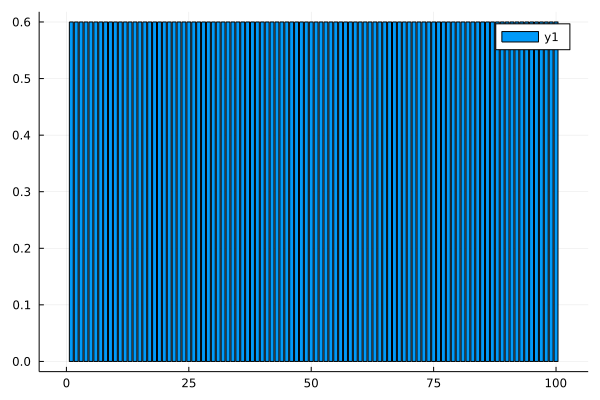

In [4]:
# motecarlo analysis
using Random, Statistics, Plots
function montecarlo_analysis(b_0=0.5, b_1=0.6; seed)
    Random.seed!(seed)
    f(x) = b_0 + b_1*x
    x = rand(1000)
    y = map(x->f(x), x)
    u_x, u_y = mean(x), mean(y)
    beta_hat = sum((x.-u_x) .* (y.-u_y)) / sum((x.-u_x).^2)
    return beta_hat
end

result = []
for i in range(start=1, stop=1000, step=10)
    push!(result, montecarlo_analysis(seed=400000))
end

